### Regime Identification in Multivariate Time-series

In [1]:
import numpy as np
import pandas as pd
from clasp import ClaSP
from scipy import stats
from spdms import getSPDMs
from scipy.stats import norm
# import statsmodels.api as sm
# from sklearn import metrics
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
import seaborn as sns

In [2]:
from geomstats.learning.kmeans import RiemannianKMeans
from geomstats.geometry.hypersphere import Hypersphere
import geomstats.backend as gs
import geomstats.visualization as visualization
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

np.random.seed(1)
gs.random.seed(1000)

INFO: Using numpy backend


In [3]:
# Normalization (Standard)
def normalize(data, type='minmax'):

    if type=='std':
        return (np.array(data) - np.mean(data))/np.std(data)
        
    elif type=='minmax':
        return (np.array(data) - np.min(data))/(np.max(data) - np.min(data))

In [4]:
def pyriemann_clusters(data):
    
    distortions = []
    inertias = []
    mapping1 = {}
    mapping2 = {}
    
    kmeans = Kmeans(2, metric='riemann', tol=1e-3, init='random')
    kmeans.fit(data)
    labels = kmeans.predict(data)
    centroids = kmeans.centroids
    print(labels)


#     Find optimal number of regimes
 
#     for k in K:
#         kmeans = KMeans(k, 'riemann', tol=1e-3, init='random')
#         kmeans.fit(data)
#         labels = kmeans.predict(data)
#         centroids = kmeans.centroids
#         print(labels)
        
#         distortions.append(sum(np.min(cdist(data, kmeans.centroids, 'euclidean'), axis=1)) / np.array(data).shape[0])
#         inertias.append(kmeans.inertia_)
#         mapping1[k] = sum(np.min(cdist(data, kmeans.centroids, 'euclidean'), axis=1)) / np.array(data).shape[0]
#         mapping2[k] = kmeans.inertia_
        
#     #   The elbow method for optimal number of clusters
#     plt.plot(K, inertias, 'bx-')
#     plt.xlabel('Values of K')
#     plt.ylabel('Distortion')
#     plt.title('The Elbow Method using Distortion')
#     plt.show()
    
    return labels

In [5]:
from sklearn.cluster import KMeans
from pyriemann.clustering import Kmeans
from sklearn import metrics
from scipy.spatial.distance import cdist

def get_regimes(data, wsize, dist_metric):
    
    covmat, covar, cluster_idx = getSPDMs(data, wsize)
    
    if dist_metric == 'Euclidean':
        
        kmeans = KMeans(n_clusters=2, random_state=0, n_init=1).fit(covmat)
        clusters = list(kmeans.labels_)
        print(f"Clusters: {list(kmeans.labels_)}")
    
#     for k in K:
#             kmeans = KMeans(n_clusters=k, random_state=0, n_init=1).fit(covmat)
#             clusters = list(kmeans.labels_)
#             print(f"Clusters: {list(kmeans.labels_)}")
        
#             distortions.append(sum(np.min(cdist(covmat, kmeans.cluster_centers_, 'mahalanobis'), axis=1)) / np.array(covmat).shape[0])
#             inertias.append(kmeans.inertia_)
#             mapping1[k] = sum(np.min(cdist(covmat, kmeans.cluster_centers_, 'mahalanobis'), axis=1)) / np.array(covmat).shape[0]
#             mapping2[k] = kmeans.inertia_
        
#         #   The elbow method for optimal number of clusters
#         plt.plot(K, inertias, 'bx-')
#         plt.xlabel('Values of K')
#         plt.ylabel('Distortion')
#         plt.title('The Elbow Method using Distortion')
#         plt.show()
    
    else:
#         clusters = cluster(np.array(covmat))
        clusters = pyriemann_clusters(np.array(covar))
#     
    print(f"Clusters indecis: {cluster_idx}")
    return clusters, cluster_idx

In [6]:
data = pd.read_csv(r'../datasets/moxa_data_D.csv')
# data = pd.read_csv(r'../datasets/synthetic_datac.csv')

In [7]:
# start, end = '2016-06-15', '2016-12-30'
# mask = (data['DateTime'] > '2014-11-01') & (data['DateTime'] <= '2015-12-28')
# data = data.loc[mask]
data = data.fillna(method='pad')
data = data.set_index('DateTime')
# data = data[start: end]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 2014-11-01 to 2017-10-31
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rain                   1096 non-null   float64
 1   temperature_outside    1096 non-null   float64
 2   pressure_outside       1096 non-null   float64
 3   gw_mb                  1096 non-null   float64
 4   gw_sr                  1096 non-null   float64
 5   gw_sg                  1096 non-null   float64
 6   gw_west                1096 non-null   float64
 7   gw_knee                1096 non-null   float64
 8   gw_south               1096 non-null   float64
 9   wind_x                 1096 non-null   float64
 10  winx_y                 1096 non-null   float64
 11  snow_load              1096 non-null   float64
 12  humidity               1096 non-null   float64
 13  glob_radiaton          1096 non-null   float64
 14  strain_ew_uncorrected  1096 non-null   float64

In [8]:
data.isnull().sum()

rain                     0
temperature_outside      0
pressure_outside         0
gw_mb                    0
gw_sr                    0
gw_sg                    0
gw_west                  0
gw_knee                  0
gw_south                 0
wind_x                   0
winx_y                   0
snow_load                0
humidity                 0
glob_radiaton            0
strain_ew_uncorrected    0
strain_ns_uncorrected    0
strain_ew_corrected      0
strain_ns_corrected      0
tides_ew                 0
tides_ns                 0
dtype: int64

In [9]:
data.isna().sum().sum()

0

In [10]:
data = data.apply(normalize)
# data.head(100)

In [11]:
data.isnull().sum()

rain                     0
temperature_outside      0
pressure_outside         0
gw_mb                    0
gw_sr                    0
gw_sg                    0
gw_west                  0
gw_knee                  0
gw_south                 0
wind_x                   0
winx_y                   0
snow_load                0
humidity                 0
glob_radiaton            0
strain_ew_uncorrected    0
strain_ns_uncorrected    0
strain_ew_corrected      0
strain_ns_corrected      0
tides_ew                 0
tides_ns                 0
dtype: int64

/home/ahmad/anaconda3/envs/deepcause/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


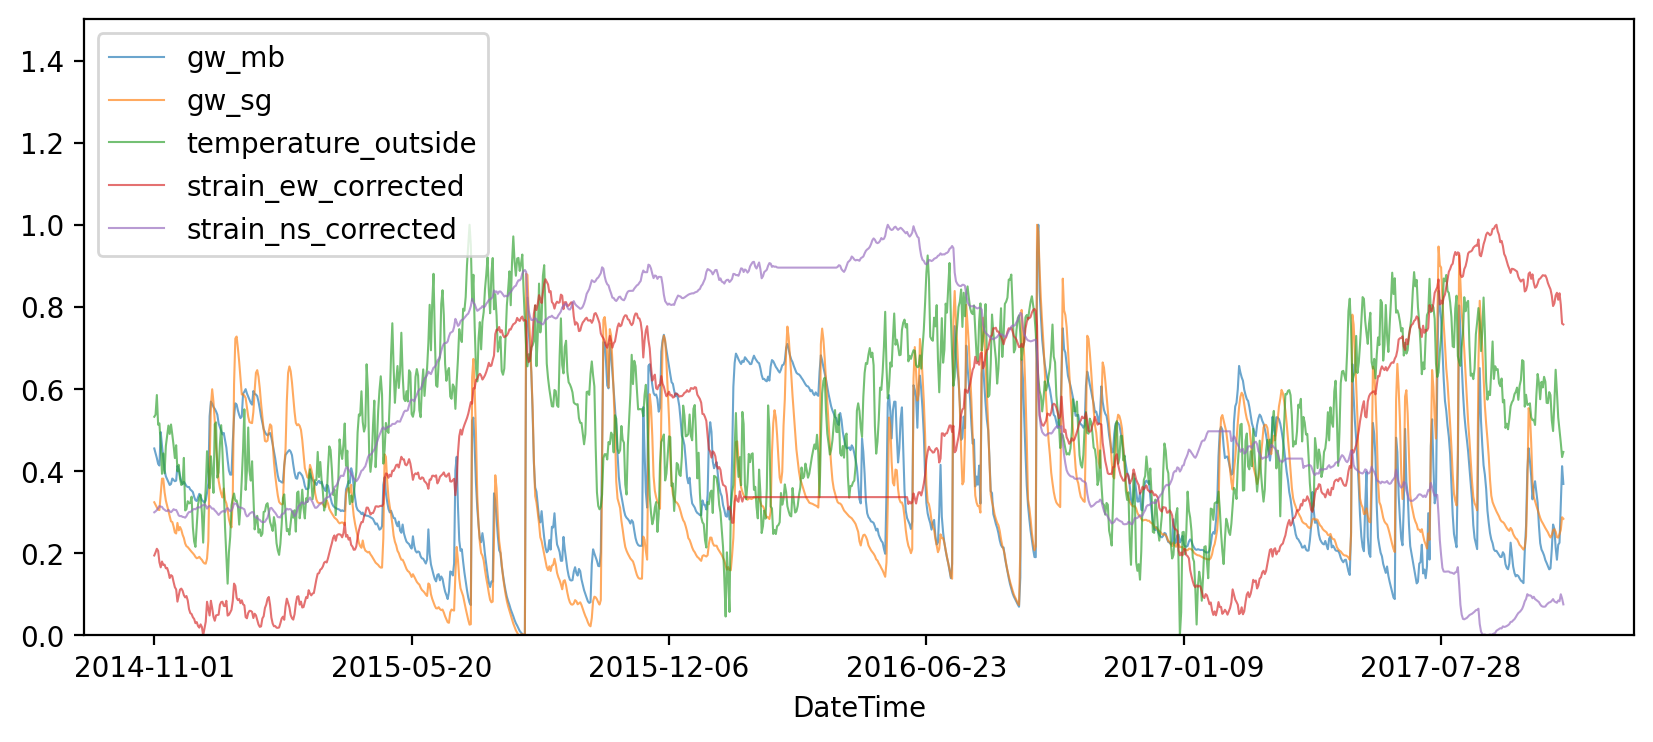

In [12]:
# toplot = [ 'rain', 'snow_load', 'pressure_outside','gw_mb', 'gw_sg', 'gw_west', 'strain_ns_corrected']
toplot = ['gw_mb', 'gw_sg', 'temperature_outside', 'strain_ew_corrected', 'strain_ns_corrected']
# toplot = ['Z1', 'Z2','Z3']

for i in toplot:
    data[i].plot(use_index=True, figsize=(10, 4), linewidth=0.75, alpha=0.66)
    plt.legend(toplot)


plt.ylim(0, 1.5)
# plt.gcf().autofmt_xdate()
# plt.legend(['Temperature', 'Ground Water', 'Strain_EW', 'Strain_NS'])
# plt.legend(['$Z_{1}$', '$Z_{2}$', '$Z_{3}$'])
# plt.savefig("synreg25Apr.png")
plt.show()

In [20]:
winsize = 155 # 85
metricE = 'Euclidean'
metricR = 'Riemannian'
clusters, cluster_idx = get_regimes(data, winsize, metricR)

[1 0 1 1 0 1 0]
Clusters indecis: [0, 155, 310, 465, 620, 775, 930]


/home/ahmad/anaconda3/envs/deepcause/lib/python3.8/site-packages/pyriemann/utils/mean.py:456: UserWarning: Convergence not reached
  warnings.warn('Convergence not reached')


In [21]:
clusters_extended = []

for i in range(len(clusters)):

    val = clusters[i]
    for j in range(winsize):
        clusters_extended.append(val)
        
print(len(clusters_extended), data.shape)

1085 (1096, 20)


In [22]:
datanew = data.iloc[:len(clusters_extended), :].copy()
datanew['Clusters'] = clusters_extended

In [23]:
# dfs = []
# for c in range(len(list(set(clusters)))):
#         dfs.append(datanew.loc[datanew['Clusters'] == list(set(clusters))[c]])

/home/ahmad/anaconda3/envs/deepcause/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 2400x800 with 0 Axes>

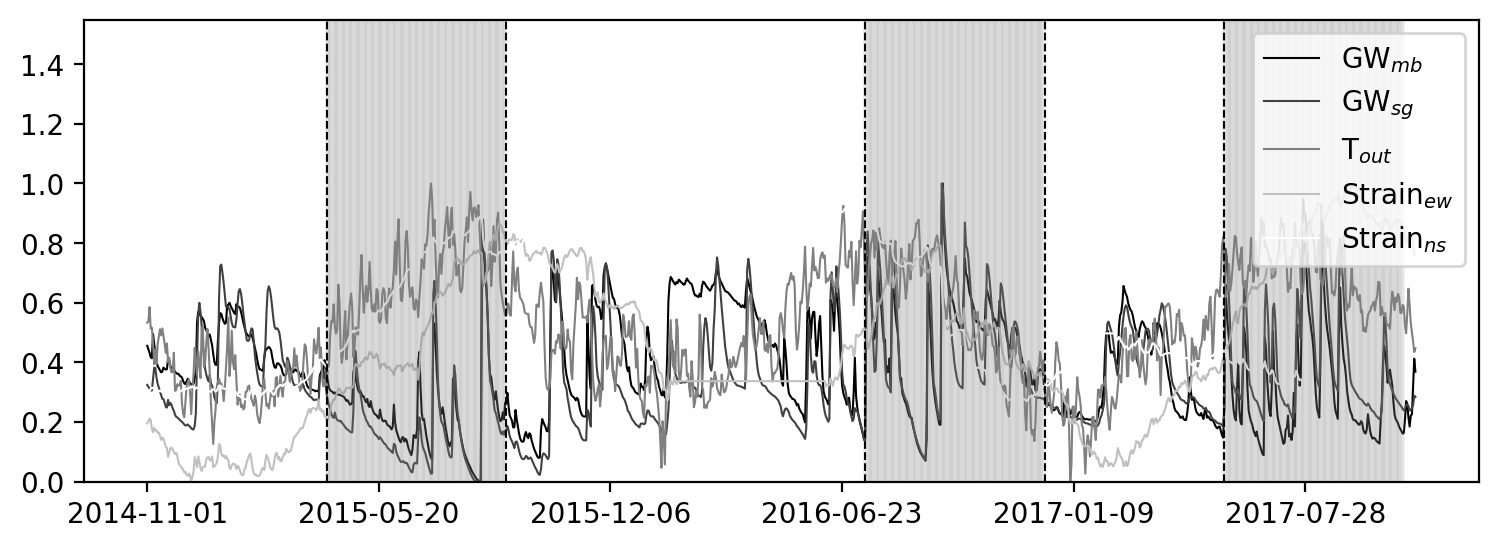

In [39]:
# Plot regimes in synthetic data

# toplot = [ 'rain','strain_ns_corrected', 'tides_ns', 'temperature_outside', 'pressure_outside', 'gw_west']
toplot = ['gw_mb', 'gw_sg', 'temperature_outside', 'strain_ew_corrected', 'strain_ns_corrected']
# toplot = ['gw_mb', 'gw_sg', 'gw_west', 'gw_south', 'strain_ns_corrected']
# toplot = ['Z1', 'Z3', 'Z5']
# toplot = ['Hs', 'P', 'W' ]
colors = ['r', 'g', 'b', 'y', 'c']
# toplot = ['t1', 't2']

t = np.arange(0, cluster_idx[-1]+winsize)
start = 0


# for c in range(len(clusters)):
    
#     if clusters[c] == 0:
#             marker = '-'
#     elif clusters[c] == 1:
#             marker = '-'
#     elif clusters[c] == 2:
#             marker = '-'
#     for i in toplot:
        
#         data[i].plot(use_index=True)
#         plt.legend(toplot)
# #         plt.plot(t[start: start+winsize], data[toplot[i]].values[start: start + winsize], colors[i]+marker)
# #         plt.plot(t[start: start + winsize], data[toplot[i+1]].values[start: start + winsize], color)
# #         plt.plot(t[start: start + winsize], data[toplot[i+2]].values[start: start + winsize], color)
        
#     start = start + winsize


plt.figure(figsize=(12, 4))
col = ['teal', 'slategrey', 'goldenrod']
mark = ['-', '--', '.-.']

# for i, v in enumerate(toplot):
#         data.plot(use_index=True, figsize=(10, 3), linewidth=0.75)
#         plt.plot(data[v], mark[i], color=col[i])
#         plt.plot(t[start: start+winsize], data[toplot[i]].values[start: start + winsize], colors[i]+marker)
#         plt.plot(t[start: start + winsize], data[toplot[i+1]].values[start: start + winsize], color)
#         plt.plot(t[start: start + winsize], data[toplot[i+2]].values[start: start + winsize], color)

data[toplot].plot(use_index=True, cmap='gray', figsize=(9, 3), linewidth=0.75)
plt.legend(toplot)
for c in range(len(cluster_idx)):

    val = cluster_idx[c]
    if clusters[c] == 0:
        for v in range(winsize):
            plt.axvline(val+v, color="gray", alpha=0.1)
    if clusters[c] == 1:
        for v in range(winsize):
            plt.axvline(val+v, color="white", alpha=0.00)
    if clusters[c] == 2:
        for v in range(winsize):
            plt.axvline(val+v, color="gray", alpha=0.15)
    if c not in [0, 3]:
        plt.axvline(x=val, color='black', linestyle='--', linewidth=0.75)
# plt.axvline(x=365, color='red')
# plt.text(305, 1.10, 'Change Point', fontsize=9.0, fontweight='bold')
# plt.axvline(x=730, color='red')
# plt.text(670, 1.10, 'Change Point', fontsize=9.0, fontweight='bold')
plt.ylim(0, 1.55)
# plt.gcf().autofmt_xdate()
# plt.legend(['$Z_{1}$', '$Z_{2}$', '$Z_{3}$'], loc='upper left', fontsize=6, prop=dict(weight='bold'))
plt.legend(['GW$_{mb}$', 'GW$_{sg}$', 'T$_{out}$', 'Strain$_{ew}$', 'Strain$_{ns}$'], loc='upper right')
plt.xlabel('')
plt.savefig("../res/georegimes1.pdf", bbox_inches='tight')
plt.show()

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categori

IndexError: list index out of range

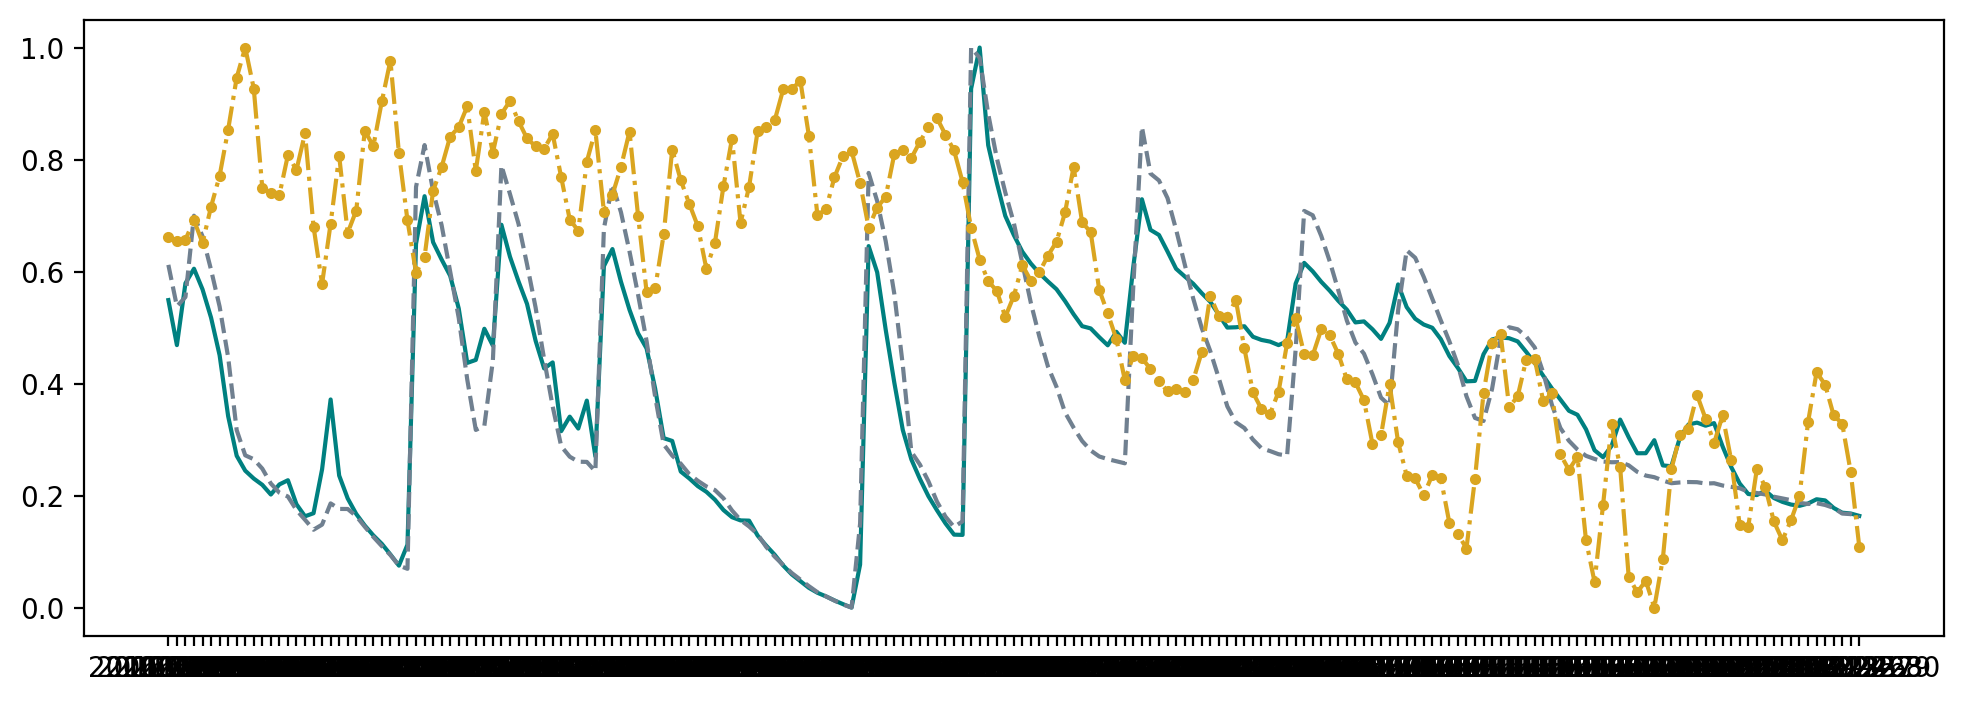

In [84]:
# Plot regimes in synthetic data

toplot = ['Z1', 'Z3', 'Z5']
# toplot = ['Hs', 'P', 'W' ]
colors = ['r', 'g', 'b', 'y', 'c']

t = np.arange(0, cluster_idx[-1]+winsize)
start = 0


# for c in range(len(clusters)):
    
#     if clusters[c] == 0:
#             marker = '-'
#     elif clusters[c] == 1:
#             marker = '-'
#     elif clusters[c] == 2:
#             marker = '-'
#     for i in toplot:
        
#         data[i].plot(use_index=True)
#         plt.legend(toplot)
# #         plt.plot(t[start: start+winsize], data[toplot[i]].values[start: start + winsize], colors[i]+marker)
# #         plt.plot(t[start: start + winsize], data[toplot[i+1]].values[start: start + winsize], color)
# #         plt.plot(t[start: start + winsize], data[toplot[i+2]].values[start: start + winsize], color)
        
#     start = start + winsize

plt.figure(figsize=(12, 4))
col = ['teal', 'slategrey', 'goldenrod']
mark = ['-', '--', '.-.']
for i, v in enumerate(toplot):
        # data.plot(use_index=True, figsize=(10, 3), linewidth=0.75, alpha=0.66, color=['green', 'blue', 'red'])
        plt.plot(data[v], mark[i], color=col[i])
#         plt.plot(t[start: start+winsize], data[toplot[i]].values[start: start + winsize], colors[i]+marker)
#         plt.plot(t[start: start + winsize], data[toplot[i+1]].values[start: start + winsize], color)
#         plt.plot(t[start: start + winsize], data[toplot[i+2]].values[start: start + winsize], color)


plt.legend(toplot)
for c in range(len(cluster_idx)):
        pass
    # val = cluster_idx[c]
    # if clusters[c] == 0:
    #     for v in range(winsize):
    #         plt.axvline(val+v, color="green", alpha=0.1)
    # if clusters[c] == 1:
    #     for v in range(winsize):
    #         plt.axvline(val+v, color="white", alpha=0.00)
    # if clusters[c] == 2:
    #     for v in range(winsize):
    #         plt.axvline(val+v, color="red", alpha=0.1)
plt.axvline(x=365, color='red')
plt.text(305, 1.10, 'Change Point', fontsize=9.0, fontweight='bold')
plt.axvline(x=730, color='red')
plt.text(670, 1.10, 'Change Point', fontsize=9.0, fontweight='bold')
plt.ylim(0, 1.20)
# plt.gcf().autofmt_xdate()
plt.legend(['$Z_{1}$', '$Z_{2}$', '$Z_{3}$'], loc='upper left', fontsize=6, prop=dict(weight='bold'))
# plt.savefig("../res/synregimes1.png")
plt.show()